In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Pre-Tourney KenPom Data from 2002 through 2018

In [91]:
# Read in Rating Datasets
nums = ['0'+str(i) for i in range(2,10)] + [str(i) for i in range(10,19)]
data = pd.DataFrame()
for num in nums: 
    data = data.append(pd.read_csv('data/pomeroy_ratings/summary{}_pt.csv'.format(num)))
    
data.head()

,Season,TeamName,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed
0,2002,Duke,77.0734,8,73.9016,10,116.373,1,121.374,1,90.2544,4,87.3522,2,34.0220,1,1.0
1,2002,Cincinnati,68.4368,212,66.9485,202,112.274,10,117.448,7,86.3924,1,86.6033,1,30.8442,2,1.0
2,2002,Kansas,79.0371,5,77.6019,2,114.544,4,118.100,5,94.4261,39,90.3113,7,27.7883,3,1.0
3,2002,Maryland,75.2758,20,73.3263,16,113.167,5,118.151,4,94.3706,36,91.2974,12,26.8534,4,1.0
4,2002,Florida,71.8971,84,69.5612,95,110.418,22,115.387,16,91.1250,7,89.6694,5,25.7176,5,5.0


In [92]:
# Get Average AdjEM for Each Seed
seed_avg_EM = []
seed_sd_EM = []
for i in range(1,17):
    temp_df = data[data['seed']==i]
    seed_avg_EM.append(np.mean(temp_df['AdjEM']))
    seed_sd_EM.append(np.std(temp_df['AdjEM']))

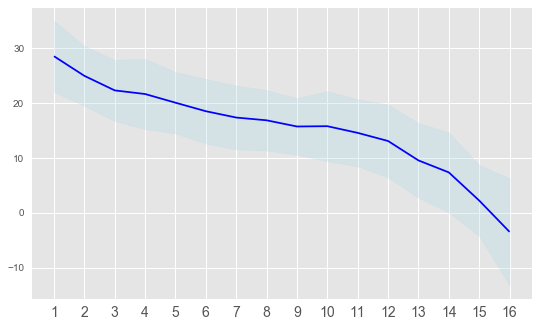

In [112]:
lower = np.array(seed_avg_EM) - np.array(np.multiply(seed_sd_EM, 1.996)) # 95% CI w/ t-dist
upper = np.array(seed_avg_EM) + np.array(np.multiply(seed_sd_EM, 1.996))

fig, ax = plt.subplots(1,1,figsize=(8,5))

#plt.style.use('seaborn-notebook')

ax.plot(seed_avg_EM, color='blue')
#ax.plot(lower, color='lightblue')
#ax.plot(upper, color='lightblue')

ax.fill_between(range(16),lower, seed_avg_EM, color='lightblue', alpha=.3)
ax.fill_between(range(16),upper, seed_avg_EM, color='lightblue', alpha=.3)

ax.set_xticks(range(16))
ax.set_xticklabels(range(1,17), fontsize=14)

#ax.set_facecolor('w')

plt.show()

In [80]:
def difficulty(seed1, seed2):
    return seed_avg_EM[seed1-1]-seed_avg_EM[seed2-1]

# Get Difference in AdjEM of 1-8/9 seeds and 2-10 Seeds
eightnine = (seed_avg_EM[8-1] + seed_avg_EM[9-1])/2
print('Difference in Avg EdjEM of 1 seeds and 8/9 seeds is: ', seed_avg_EM[1-1]-eightnine)
print('Difference in Avg EdjEM of 2 seeds and 10 seeds is: ', difficulty(2,10))
print('Ratio of these two: ', (seed_avg_EM[1-1]-eightnine)/difficulty(2,10))



Difference in Avg EdjEM of 1 seeds and 8/9 seeds is:  12.222581102941177
Difference in Avg EdjEM of 2 seeds and 10 seeds is:  9.1635175
Ratio of these two:  1.333830715436641


In [27]:
data[data['seed']==2].shape

(68, 17)